In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import sweetviz as sv
from ydata_profiling import ProfileReport

In [2]:
# Load the CSV file 'census05.csv' into a Pandas DataFrame called df_data
df_data= pd.read_csv('census05.csv') 

In [3]:
# Create a copy of the DataFrame df_data and assign it to a new variable called df
df=df_data.copy()

In [4]:
# Display the first five rows of the DataFrame df
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Cannon Street,Steven,Webster,45,Head,Single,Male,Chief Technology Officer,None,None
1,1,Cannon Street,Wayne,Perkins,39,None,Single,Male,"Therapist, horticultural",None,None
2,1,Cannon Street,Garry,O'Sullivan,43,None,Single,Male,Records manager,None,Methodist
3,1,Cannon Street,Jenna,Herbert,62,None,Single,Female,Outdoor activities/education manager,None,None
4,2,Cannon Street,Katy,Johnson,48,Head,Single,Female,"Loss adjuster, chartered",None,None


In [5]:
# Display the column data types and the number of non-null values in each column of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   6000 non-null   int64 
 1   Street                         6000 non-null   object
 2   First Name                     6000 non-null   object
 3   Surname                        6000 non-null   object
 4   Age                            6000 non-null   object
 5   Relationship to Head of House  6000 non-null   object
 6   Marital Status                 4719 non-null   object
 7   Gender                         6000 non-null   object
 8   Occupation                     6000 non-null   object
 9   Infirmity                      6000 non-null   object
 10  Religion                       4681 non-null   object
dtypes: int64(1), object(10)
memory usage: 515.8+ KB


In [6]:
# Count the number of missing (NaN) values in each column of the DataFrame df
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1281
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1319
dtype: int64

In [7]:
# Identify any duplicate rows in the DataFrame df
df[df.duplicated()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## DATA CLEANING

### Street

In [8]:
# Display the unique values in the 'Street' column of the DataFrame df
df.Street.unique()

array(['Cannon Street', 'September Lake', 'Gill Heights',
       'Musictill Drive', 'Friary Spurs', 'Hereford Road', 'Ripon Port',
       'Parry Crescent', 'Marsh Lane', 'Wessex Drive', 'Dodd Street',
       'Ely Road', 'Mitchell Crossing', 'Pigeonpound Lane',
       'Violetloop Road', 'Davies Crescent', 'Price Locks',
       'Knowles Street', 'Anglia Road', 'Lichfieldcharm Drive',
       'Jones Cape', 'Gwent Lock', 'Powell Coves', 'Hall Loop',
       'Farrell Avenue', 'Jones Avenue', 'Portsmouth Rest',
       'Gibbs Crescent', 'Hopkins Crescent', 'Threpenny Road',
       'Dolphin Walks', 'Evans Hills', 'Spring Prairie', 'Farthing Burgs',
       'James Avenue', 'Middleton Prairie', 'Hove Crescent',
       'Collier Squares', 'Glory Crescent', 'Smith Islands',
       'Hove Unions', 'Leisure Mall', 'Newcastle River', 'Penny Drive',
       'Chester Road', 'Gardner Crescent', 'Johnson Road',
       'Fisher Rapids', 'Knight Avenue', 'Morar Course', 'Scotland Road',
       'Powell Road', 'Har

### House Number

In [9]:
# Display the unique values in the 'House Number' column of the DataFrame df
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160], dtype=int64)

### First Name

In [10]:
# Display the unique values in the 'First Name' column of the DataFrame df
df['First Name'].unique()

array(['Steven', 'Wayne', 'Garry', 'Jenna', 'Katy', 'Grace', 'Julie',
       'Katie', 'Simon', 'Chelsea', 'Francis', 'Megan', 'Barbara',
       'Sandra', 'Robert', 'Marc', 'Ashleigh', 'Jodie', 'Kieran',
       'Yvonne', ' ', 'Kathleen', 'Andrea', 'Anne', 'Patricia',
       'Samantha', 'Terry', 'Wendy', 'Kyle', 'Adrian', 'Lynne', 'Bernard',
       'Louise', 'Bethan', 'Darren', 'Geoffrey', 'Victor', 'Marion',
       'Eileen', 'Jacqueline', 'Alan', 'Alison', 'Connor', 'Sara', 'Beth',
       'Andrew', 'Marie', 'Joseph', 'Paula', 'Brandon', 'Jill', 'Sian',
       'Jessica', 'Mathew', 'Matthew', 'Kim', 'Nicola', 'Douglas', 'Gary',
       'Zoe', 'Derek', 'Lewis', 'Karen', 'Margaret', 'Graeme', 'Heather',
       'Rhys', 'Lauren', 'Katherine', 'Sam', 'Hayley', 'Stacey', 'Fiona',
       'Conor', 'Samuel', 'Carl', 'Valerie', 'Christine', 'Lesley',
       'Sheila', 'Duncan', 'Denise', 'Maria', 'Ben', 'Gerald', 'Laura',
       'Olivia', 'Tom', 'Clive', 'Bethany', 'Allan', 'Dorothy', 'Callum',
     

In [11]:
# Select all rows in the DataFrame df where the 'First Name' column contains a blank space
df[df['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
20,7,Cannon Street,,Cross,34,Head,Single,Male,Speech and language therapist,None,Christian


1. We discovered a cell with an empty string in the first name at the 20th row
2. It would be replaced with "Unknown"

In [12]:
# Replace all occurrences of a single blank space in the 'First Name' column of the DataFrame df with the string 'Unknown'
df['First Name'].replace(' ', 'Unknown', inplace=True)

### Surname

In [13]:
# Display the unique values in the 'Surname' column of the DataFrame df
df['Surname'].unique()

array(['Webster', 'Perkins', "O'Sullivan", 'Herbert', 'Johnson', 'Brown',
       'Jones', 'Grant', 'Randall', 'Bird', 'Smith', 'Perry', 'Roberts',
       'Cross', 'Carroll', 'Bradshaw', 'Myers', 'Clark', 'Graham',
       'Powell', 'Murphy', 'Davies', 'Reid', 'Taylor', 'Kennedy',
       'Charlton', 'Wilkinson', 'Davison', 'Kaur', 'Dunn', 'Lewis',
       'Parkes-Yates', 'Norton', 'Watkins', 'Warren', 'Hughes-Warren',
       'Parker', 'Cunningham', 'Turner', 'Kirk', 'Ali', 'Jackson', 'Cox',
       'Bennett', 'Porter', 'Clarke', 'Hughes', 'Campbell', 'Baker',
       'Hudson', 'Hartley', 'Walters', 'Hutchinson', 'Pearson', 'Fuller',
       'Willis', 'Walton', 'Bailey', 'Baldwin', 'Evans', 'Barker', 'Dale',
       'Harrison', 'Browne', 'Khan', 'Edwards', 'Jarvis', 'Parker-Jarvis',
       'Green', 'Watts', 'Young', 'Coleman', 'McCarthy', 'Nolan', 'Sharp',
       'Hussain', 'Fowler', 'Wilson', 'Holmes', 'Elliott', 'Sanders',
       'Lawrence', 'Boyle', 'Kemp', 'Page', 'Howell', 'Higgins',
    

In [14]:
# Select all rows in the DataFrame df where the 'Surname' column contains a blank space
df[df['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Age

In [15]:
# Display the unique values in the 'Age' column of the DataFrame df
df.Age.unique()

array(['45', '39', '43', '62', '48', '16', '14', '11', '18', '19', '52',
       '51', '24', '9', '58', '59', '1', '34', '25', '42', '6', '2', '67',
       '65', '36', '28', '22', '40', '47', '3', '20', '26', '38', '0',
       '21', '54', '95', '97', '10', '49', '30', '4', '37', '57', '27',
       '41', '56', '60', '23', '64', '44', '13', '55', '8', '35', '74',
       '78', '63', '31', '61', '7', '72', '46', '29', '32', '15', '53',
       '76', '5', '88', '50', '33', '77', '17', '79', '70', '80', '68',
       '85', '84', '75', '83', '82', '12', '86', '92', '73', '66', '71',
       '69', '89', '90', '87', '56.718750360298415', '1.0', ' ', '102',
       '96', '98', '99', '93', '81', '94', '67.66437863917258',
       '8.999999999999993', '4.999999999999993', '2.999999999999993',
       '75.34659211357395', '14.0', '10.0', '78.51677642502452',
       '33.99999999999999', '30.999999999999993', '28.999999999999993',
       '100', '105', '50.11379719017628', '3.0', '2.0', '0.0', '103',
       

In [16]:
# Select all rows in the DataFrame df where the 'Age' column contains a blank space
df[(df['Age'] == ' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
999,4,Dodd Street,Marilyn,Bradley,,Head,Married,Female,Dealer,None,None


In [17]:
# Replace all occurrences of a single blank space in the 'Age' column of the DataFrame df with a NaN value
df['Age'].replace(' ', np.nan, inplace=True)

In [18]:
# Count the number of missing (NaN) values in the 'Age' column of the DataFrame df
df['Age'].isna().sum()

1

In [19]:
# Calculate the median age from the 'Age' column of the DataFrame df
df['Age'].median()

35.0

In [20]:
# Replace missing (NaN) values in the 'Age' column of the DataFrame df with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [21]:
#To check if the changes has taken effect
df[df['First Name'] == 'Marilyn']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
524,41,Ripon Port,Marilyn,Whitehead,22,None,Single,Female,University Student,None,Methodist
999,4,Dodd Street,Marilyn,Bradley,35.0,Head,Married,Female,Dealer,None,None
1664,14,Powell Coves,Marilyn,Lucas,16,Daughter,NaN,Female,Student,None,NaN
1831,52,Jones Avenue,Marilyn,Rogers,50,Head,Single,Female,Games developer,None,Catholic
1934,21,Portsmouth Rest,Marilyn,Fox,44,Head,Married,Female,Research scientist (physical sciences),None,Catholic
2791,147,Evans Hills,Marilyn,Stewart,69,Head,Married,Female,Retired Diplomatic Services operational officer,None,None
3616,18,Morar Course,Marilyn,Graham,24,Daughter,Divorced,Female,Advertising account executive,None,Christian
3744,16,Scotland Road,Marilyn,Stephens,10,Daughter,NaN,Female,Student,None,NaN
3810,31,Scotland Road,Marilyn,Davies,29,None,Single,Female,Patent examiner,None,Christian
4173,4,Williams Avenue,Marilyn,Harris,20,Daughter,Single,Female,University Student,None,Christian


In [22]:
# Convert the 'Age' column of the DataFrame df from object type to float64 type
df = df.astype({'Age': 'float64'})

In [23]:
# Convert the 'Age' column of the DataFrame df from float64 type to int64 type
df = df.astype({'Age': 'int64'})

In [24]:
#To check if the above function worked
df.Age.unique()

array([ 45,  39,  43,  62,  48,  16,  14,  11,  18,  19,  52,  51,  24,
         9,  58,  59,   1,  34,  25,  42,   6,   2,  67,  65,  36,  28,
        22,  40,  47,   3,  20,  26,  38,   0,  21,  54,  95,  97,  10,
        49,  30,   4,  37,  57,  27,  41,  56,  60,  23,  64,  44,  13,
        55,   8,  35,  74,  78,  63,  31,  61,   7,  72,  46,  29,  32,
        15,  53,  76,   5,  88,  50,  33,  77,  17,  79,  70,  80,  68,
        85,  84,  75,  83,  82,  12,  86,  92,  73,  66,  71,  69,  89,
        90,  87, 102,  96,  98,  99,  93,  81,  94, 100, 105, 103, 101,
       104], dtype=int64)

In [25]:
#Compute summary statistics of the 'Age' column
df.Age.describe()

count    6000.000000
mean       36.798167
std        21.721466
min         0.000000
25%        19.000000
50%        35.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

### Relationship to Head of House

In [26]:
# Display the unique values in the 'Relationship to Head of House' column of the DataFrame df
df['Relationship to Head of House'].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Partner', 'Husband',
       'Granddaughter', 'Lodger', 'Wife', 'Sibling', 'Visitor', 'Cousin',
       'Grandson', 'Step-Son', 'Neice', 'Nephew', 'Step-Daughter',
       'Adopted Son', 'Adopted Daughter', 'Son-in-law'], dtype=object)

In [27]:
#filter the two records using conditions
df[(df['Relationship to Head of House'] == 'Head') & (df['Age']< 18)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3490,2,Johnson Road,Molly,Smith,17,Head,Single,Female,Unemployed,None,NaN
3917,20,Powell Road,Debra,Turnbull,16,Head,Divorced,Female,Student,None,NaN
5384,18,Hall Creek,Carolyn,Robinson,16,Head,Married,Female,Student,None,NaN


In [28]:
#Select rows where the 'Street' column and 'House Number' column meet one of the specified criteria
df[(df['Street']=='Johnson Road') & (df['House Number']==2) | (df['Street']=='Powell Road') &(df['House Number']==20)| (df['Street']=='Hall Creek') &(df['House Number']==18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3490,2,Johnson Road,Molly,Smith,17,Head,Single,Female,Unemployed,None,NaN
3491,2,Johnson Road,Anne,Smith,0,Daughter,NaN,Female,Child,None,NaN
3917,20,Powell Road,Debra,Turnbull,16,Head,Divorced,Female,Student,None,NaN
3918,20,Powell Road,Kerry,Turnbull,0,Daughter,NaN,Female,Child,None,NaN
3919,20,Powell Road,Harry,Howarth,31,Lodger,Single,Male,Occupational psychologist,None,None
5384,18,Hall Creek,Carolyn,Robinson,16,Head,Married,Female,Student,None,NaN
5385,18,Hall Creek,Leslie,Robinson,19,Husband,Married,Male,University Student,None,NaN
5386,18,Hall Creek,Charlie,Robinson,0,Son,NaN,Male,Child,None,NaN
5387,18,Hall Creek,Russell,Rose,30,Lodger,Divorced,Male,"Designer, furniture",None,None


In [29]:
# Update 'Relationship to Head of House' column to 'Head' where 'Street' is 'Hall Creek' and 'First Name' is 'Leslie'
df.loc[(df['Street']=='Hall Creek') &(df['First Name']=='Leslie'),'Relationship to Head of House']='Head'

# Update 'Relationship to Head of House' column to 'Wife' where 'Street' is 'Hall Creek' and 'First Name' is 'Carolyn'
df.loc[(df['Street']=='Hall Creek') &(df['First Name']=='Carolyn'),'Relationship to Head of House']='Wife'


In [30]:
# Drop rows where 'Street' is 'Johnson Road' and 'House Number' is 2, or where 'Street' is 'Powell Road' and 'House Number' is 20
df.drop(df[(df['Street']=='Johnson Road') & (df['House Number']==2) | (df['Street']=='Powell Road') &(df['House Number']==20)].index, inplace=True)


In [31]:
df = df.reset_index(drop=True)

### Marital Status

In [32]:
# Get the unique values in the 'Marital Status' column of the DataFrame df
df['Marital Status'].unique()

array(['Single', nan, 'Divorced', 'Married', 'Widowed'], dtype=object)

In [33]:
#Count the number of rows where the 'Marital status' column is missing (i.e., NaN)
df['Marital Status'].isna().sum()

1279

In [34]:
# Select rows in the DataFrame df where the 'Marital Status' is missing (NaN) and the 'Age' is less than 18
df.loc[(df['Marital Status'].isna()) & (df['Age']< 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,3,Cannon Street,Julie,Brown,16,Daughter,NaN,Female,Student,None,NaN
7,3,Cannon Street,Katie,Brown,14,Daughter,NaN,Female,Student,None,NaN
8,3,Cannon Street,Simon,Brown,11,Son,NaN,Male,Student,None,NaN
9,3,Cannon Street,Chelsea,Brown,11,Daughter,NaN,Female,Student,None,NaN
16,5,Cannon Street,Ashleigh,Bird,9,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5976,1,Hereford Ranch,Shane,Lee,10,Son,NaN,Male,Student,None,NaN
5977,1,Hereford Ranch,Hollie,Lee,6,Daughter,NaN,Female,Student,None,NaN
5989,1,Column Manorhouse,Timothy,Clarke,16,Son,NaN,Male,Student,None,NaN
5992,1,Guinevere Cottage,Tony,Payne,2,Son,NaN,Male,Child,None,NaN


In [35]:
# Fill in missing (NaN) values in the 'Marital Status' column of the DataFrame df with 'Single' for rows where 'Age' is less than 18
df.loc[(df['Marital Status'].isna()) & (df['Age'] < 18), 'Marital Status'] = 'NA'

### Gender

In [36]:
# Get the unique values in the 'Gender' column of the DataFrame df
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Occupation

In [37]:
# Get the unique values in the 'Occupation' column of the DataFrame df
df['Occupation'].unique()

array(['Chief Technology Officer', 'Therapist, horticultural',
       'Records manager', ...,
       'Retired Scientist, product/process development',
       'Retired Designer, jewellery',
       'Retired Lecturer, higher education'], dtype=object)

In [38]:
# Select all rows in the DataFrame df where the 'Occupation' column contains a blank space
df[df['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2943,15,Middleton Prairie,Jenna,Burton,35,Head,Married,Female,,None,Christian
3031,7,Collier Squares,Brandon,Blackburn,34,Husband,Married,Male,,None,None


In [39]:
# Get the mode of the 'Occupation' column for individuals with an age of 35
occup_mode = df['Occupation'][df['Age']==35].mode()[0]

# Print the mode of the 'Occupation' column for individuals with an age of 35
print(occup_mode)

Unemployed


In [40]:
# Replace missing (NaN) values in the 'Occupation' column of the DataFrame df with the mode for individuals with an age of 35
df['Occupation'].replace(' ', occup_mode, inplace=True)

### Infirmity

In [41]:
# Get the unique values in the 'Infirmity' column of the DataFrame df
df['Infirmity'].unique()

array(['None', ' ', 'Mental Disability', 'Physical Disability', 'Blind',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

In [42]:
# Select all rows in the DataFrame df where the 'Infirmity' column contains a blank space
df[df['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Cannon Street,Francis,Jones,18,Head,Single,Male,University Student,,Catholic
2354,35,Threpenny Road,Owen,Greenwood,14,Son,NA,Male,Student,,NaN
2537,8,Dolphin Walks,Jill,Bennett,24,Daughter,Single,Female,Charity fundraiser,,None
2719,104,Evans Hills,Amanda,Rhodes,49,Head,Married,Female,Data scientist,,Catholic
3391,4,Gardner Crescent,Suzanne,Haynes,26,Daughter,Single,Female,Environmental education officer,,None
4280,23,Williams Avenue,Philip,Wilson,22,None,Single,Male,Patent attorney,,None
4346,5,Hawkins Road,Ryan,Roberts-Wilkinson,27,Son,Divorced,Male,Unemployed,,None
5774,2,Skinner Road,Kathleen,Fletcher,14,Daughter,NA,Female,Student,,NaN
5973,1,Hereford Ranch,Molly,Lee,18,Daughter,Single,Female,Student,,None


In [43]:
# Replace any occurrences of the empty string ' ' in the 'Infirmity' column of DataFrame df with the string 'None'
df['Infirmity'].replace(' ', 'None', inplace=True)

### Religion

In [44]:
# Get the unique values in the 'Religion' column of the DataFrame df
df['Religion'].unique()

array(['None', 'Methodist', 'Christian', nan, 'Catholic', 'Muslim',
       'Jewish', 'Sikh', ' ', 'Orthodoxy', 'Baptist', 'Bahai', 'Private'],
      dtype=object)

In [45]:
#Count the number of rows where the 'Religion' column equals 'None'
(df['Religion']=='None').sum()

2105

In [46]:
#Count the number of rows where the 'Religion' column is missing (i.e., NaN)
df['Religion'].isna().sum()

1315

In [47]:
#replace the incorrect data with the apropriate value
df['Religion'].replace([np.nan,' '],'Unknown', inplace=True)

In [48]:
# Get the unique values in the 'Religion' column of the DataFrame df
df['Religion'].unique()

array(['None', 'Methodist', 'Christian', 'Unknown', 'Catholic', 'Muslim',
       'Jewish', 'Sikh', 'Orthodoxy', 'Baptist', 'Bahai', 'Private'],
      dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   5995 non-null   int64 
 1   Street                         5995 non-null   object
 2   First Name                     5995 non-null   object
 3   Surname                        5995 non-null   object
 4   Age                            5995 non-null   int64 
 5   Relationship to Head of House  5995 non-null   object
 6   Marital Status                 5995 non-null   object
 7   Gender                         5995 non-null   object
 8   Occupation                     5995 non-null   object
 9   Infirmity                      5995 non-null   object
 10  Religion                       5995 non-null   object
dtypes: int64(2), object(9)
memory usage: 515.3+ KB


In [50]:
#check again to ensure no missing values exist in the dataset
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

### DATA ANALYSIS AND VISUALIZATION

### AGE CLASSIFICATION AND AGE PYRAMID

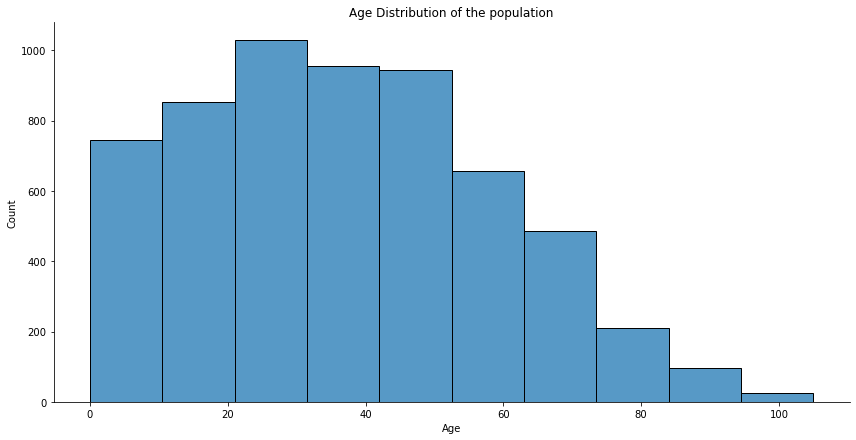

In [51]:
#Univariate plot of Age using bin_width of 5
Age_plot = sb.displot(df.Age, bins =10, height=6, aspect=2).set(title="Age Distribution of the population")

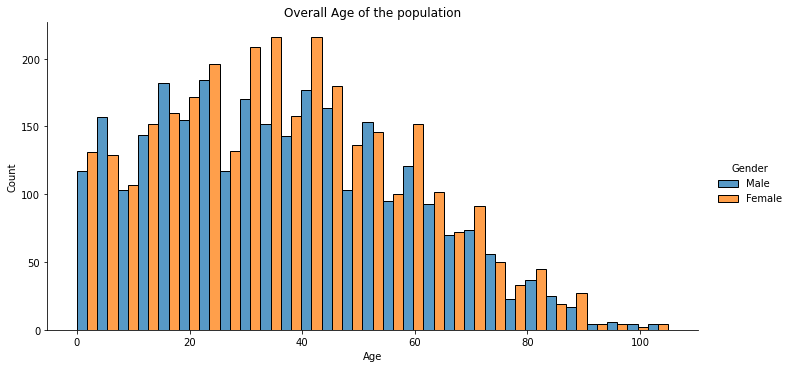

In [52]:
#Univariate plot of Age conditioned on Marital status
Age_Gender_plot = sb.displot(data=df, x=df.Age, hue='Gender', kind='hist',multiple='dodge',height=5, aspect=2).set(title="Overall Age of the population")

In [53]:
# Create a list to append the age grouping
age = []

# Using a for loop and conditional statements to categorize the age band
for age_num in df['Age']:
    
    if age_num <= 9:
        age.append('0-9')  # If age is less than or equal to 9, append '0-9' to the age list
        
    elif age_num >= 10 and age_num < 20:
        age.append('10-19')  # If age is between 10 and 19, append '10-19' to the age list
        
    elif age_num >= 20 and age_num < 30:
        age.append('20-29')  # If age is between 20 and 29, append '20-29' to the age list
        
    elif age_num >= 30 and age_num < 40:
        age.append('30-39')  # If age is between 30 and 39, append '30-39' to the age list
        
    elif age_num >= 40 and age_num < 50:
        age.append('40-49')  # If age is between 40 and 49, append '40-49' to the age list
        
    elif age_num >= 50 and age_num < 60:
        age.append('50-59')  # If age is between 50 and 59, append '50-59' to the age list
        
    elif age_num >= 60 and age_num < 70:
        age.append('60-69')  # If age is between 60 and 69, append '60-69' to the age list
        
    elif age_num >= 70 and age_num < 80:
        age.append('70-79')  # If age is between 70 and 79, append '70-79' to the age list
        
    elif age_num >= 80 and age_num < 90:
        age.append('80-89')  # If age is between 80 and 89, append '80-89' to the age list
        
    elif age_num >= 90 and age_num < 100:
        age.append('90-99')  # If age is between 90 and 99, append '90-99' to the age list
        
    else:
        age.append('100+')  # If age is 100 or greater, append '100+' to the age list


df['Age Group']  = age
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,1,Cannon Street,Steven,Webster,45,Head,Single,Male,Chief Technology Officer,None,None,40-49
1,1,Cannon Street,Wayne,Perkins,39,None,Single,Male,"Therapist, horticultural",None,None,30-39
2,1,Cannon Street,Garry,O'Sullivan,43,None,Single,Male,Records manager,None,Methodist,40-49
3,1,Cannon Street,Jenna,Herbert,62,None,Single,Female,Outdoor activities/education manager,None,None,60-69
4,2,Cannon Street,Katy,Johnson,48,Head,Single,Female,"Loss adjuster, chartered",None,None,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...
5990,1,Guinevere Cottage,Emily,Payne,30,Head,Married,Female,Associate Professor,None,None,30-39
5991,1,Guinevere Cottage,Jeffrey,Payne,36,Husband,Married,Male,English as a second language teacher,None,None,30-39
5992,1,Guinevere Cottage,Tony,Payne,2,Son,NA,Male,Child,None,Unknown,0-9
5993,1,Guinevere Cottage,Yvonne,Payne,1,Daughter,NA,Female,Child,None,Unknown,0-9


In [54]:
# Sorting the index of the age grouping for males
Male_age = df['Age Group'][df.Gender == 'Male'].value_counts().sort_index()

# Sorting the index of the age grouping for females
Female_age = df['Age Group'][df.Gender == 'Female'].value_counts().sort_index()


In [55]:
# Creating a DataFrame to store age groups, counts of males and females
age_df = pd.DataFrame({'Age': ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9'],
                       'Male': -1*Male_age, 'Female': Female_age})

# Creating a list to store the age class labels
Age_class = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']

age_df

,Age,Male,Female
0-9,100+,-335,339
10-19,90-99,-420,407
100+,80-89,-6,5
20-29,70-79,-445,479
30-39,60-69,-424,537
40-49,50-59,-403,488
50-59,40-49,-355,379
60-69,30-39,-235,266
70-79,20-29,-136,145
80-89,10-19,-78,88


([<matplotlib.axis.XTick at 0x1f32348c4c0>,
 [Text(-400, 0, '400'),
  Text(-200, 0, '200'),
  Text(0, 0, '0'),
  Text(200, 0, '200'),
  Text(400, 0, '400')])

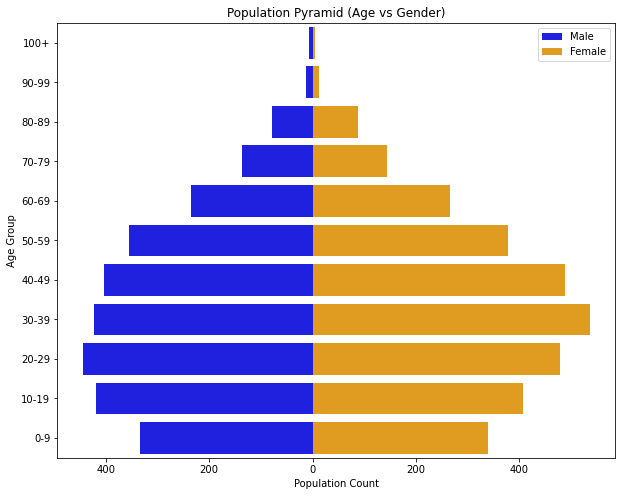

In [56]:
# Set the index name of age_df to 'Age Range'
age_df.index.names = ['Age Range']

# Reset the index of age_df
age_df.reset_index(inplace=True)

# Create a figure with a size of 10x8 inches
plt.figure(figsize=(10, 8))

# Create a bar plot for male population count
age_pyramid = sb.barplot(data=age_df, x='Male', y='Age Range', color='blue', order=Age_class, label='Male')

# Create a bar plot for female population count, overlaying on top of the male bar plot
age_pyramid = sb.barplot(data=age_df, x='Female', y='Age Range', color='orange', order=Age_class, label='Female')

# Add a legend to the plot
age_pyramid.legend()

# Set the x-axis and y-axis labels
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

# Set the title of the plot
plt.title('Population Pyramid (Age vs Gender)')

#Set the x-tick labels to be absolute values, instead of the default relative values
plt.xticks([-400,-200, 0,200,400],[400,200,0,200,400])


In [57]:
#Compute and transpose summary statistics of the 'Age' column
df['Age'].describe().T

count    5995.000000
mean       36.818182
std        21.716820
min         0.000000
25%        19.000000
50%        35.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

### Religion Analysis

In [58]:
# Check for possible false religions by looking at low-frequency religions
low_freq_religions = df['Religion'].value_counts()[df['Religion'].value_counts() < 5]
low_freq_religions

Private      2
Orthodoxy    1
Baptist      1
Bahai        1
Name: Religion, dtype: int64

In [59]:
# Investigate potential false religions by examining other columns
potential_false_religions = df[df['Religion'].isin(low_freq_religions.index)]
(potential_false_religions)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
3130,22,Smith Islands,Gerald,Smith,46,Head,Divorced,Male,"Copywriter, advertising",None,Orthodoxy,40-49
3471,35,Gardner Crescent,Eileen,Ward,29,Head,Single,Female,PhD Student,None,Baptist,20-29
3847,42,Scotland Road,Scott,Randall,22,None,Single,Male,University Student,None,Bahai,20-29
4412,15,Green Lane,Kirsty,Jones,46,Head,Married,Female,TEFL teacher,None,Private,40-49
4413,15,Green Lane,Josh,Jones,47,Husband,Married,Male,Psychiatrist,None,Private,40-49


Text(0.5, 1.0, 'Religion Affliation')

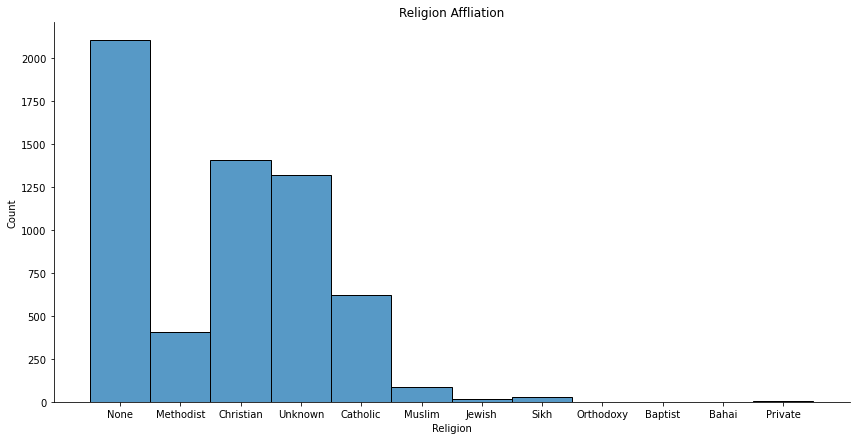

In [60]:
sb.displot(df['Religion'], aspect=2, height=6)
plt.title('Religion Affliation')

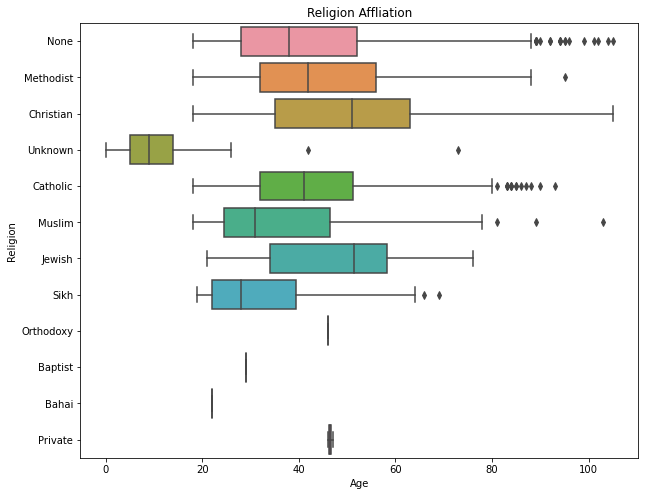

In [61]:
plt.figure(figsize=[10,8])
sb.boxplot(x='Age', y='Religion', data=df)
plt.title('Religion Affliation')
plt.show()

### OCCUPATION CLASSIFICATION AND PLOT

In [62]:
#Get unique values in the 'Occupation' column of DataFrame 'df'
df.Occupation.unique()

array(['Chief Technology Officer', 'Therapist, horticultural',
       'Records manager', ...,
       'Retired Scientist, product/process development',
       'Retired Designer, jewellery',
       'Retired Lecturer, higher education'], dtype=object)

In [63]:
# change all Retiree's records to a single string: 'Retired'

df.loc[df['Occupation'].str.contains('Retired'), 'Occupation'] = 'Retired'

#change all Unemployed persons above the age of 65 to Retired because of the limited chances in the job market
df.loc[(df['Occupation'] >= 'Unemployed') & (df['Age'] >= 65), 'Occupation'] = 'Retired'

#change all PhD students to University Students since they attend a university
df.loc[df['Occupation'].str.contains('PhD Student'), 'Occupation'] = 'University Student'

In [64]:
#Get unique values in the 'Occupation' column of DataFrame 'df'
df.Occupation.unique()

array(['Chief Technology Officer', 'Therapist, horticultural',
       'Records manager', 'Outdoor activities/education manager',
       'Loss adjuster, chartered', 'Designer, ceramics/pottery',
       'Student', 'University Student', 'Patent examiner', 'Dentist',
       'Colour technologist', 'Make', 'Sports therapist', 'Child',
       'Speech and language therapist', 'Barista', 'Clinical biochemist',
       'Engineer, petroleum', 'Operations geologist', 'IT trainer',
       'Engineer, communications', 'Race relations officer',
       "Nurse, children's", 'Production assistant, television', 'Gaffer',
       'Merchant navy officer', 'Agricultural engineer',
       'Social researcher', 'Unemployed', 'Plant breeder/geneticist',
       'Public affairs consultant', 'Retired', 'Copywriter, advertising',
       'Exhibition designer', 'Engineer, mining',
       'Psychologist, educational', 'Geneticist, molecular',
       'Firefighter', 'Housing manager/officer',
       'Administrator, Civil Se

In [65]:
#Filter the DataFrame 'df' to include only rows where 'Occupation' is equal to 'Land'
df[df['Occupation'] == 'Land']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
2594,17,Evans Hills,Claire,Hurst,58,Head,Single,Female,Land,None,Christian,50-59
2926,10,Middleton Prairie,Carol,Knight,25,None,Single,Female,Land,None,Muslim,20-29
3019,1,Collier Squares,Connor,Brown,43,Head,Single,Male,Land,None,None,40-49


In [66]:
#change all vague occupation to 'Not Given' since the provided informaion is incomplete
df.loc[(df['Occupation'] == 'Make') | (df['Occupation'] == 'Land') | (df['Occupation'] == 'Sub') | (df['Occupation'] == 'Copy'), 'Occupation'] = 'Not Given'

In [67]:
#Create an empty list to store the job category for each occupation
job_status = []

#Loop through each occupation in the 'Occupation' column of the DataFrame

for i, job in enumerate(df['Occupation']):
    
    i= job
# Use conditional statements to categorize each occupation into one of several groups
    if job == 'Retired':
        job_status.append('Retired')
    elif job == 'Student':
        job_status.append('Student')
    elif job == 'University Student':
        job_status.append('Student')
    elif job == 'Child':
        job_status.append('Child')
    elif  job == 'Unemployed':
        job_status.append('Unemployed')
    elif  job == 'Not Given':
        job_status.append('Unknown')
    else:
        job_status.append('Employed')
#Add a new column to the DataFrame with the job category for each occupation        
df['Occupation Category'] = job_status

In [68]:
df['Occupation Category'].unique()

array(['Employed', 'Student', 'Unknown', 'Child', 'Unemployed', 'Retired'],
      dtype=object)

Text(0.5, 1.0, 'Occupation Category')

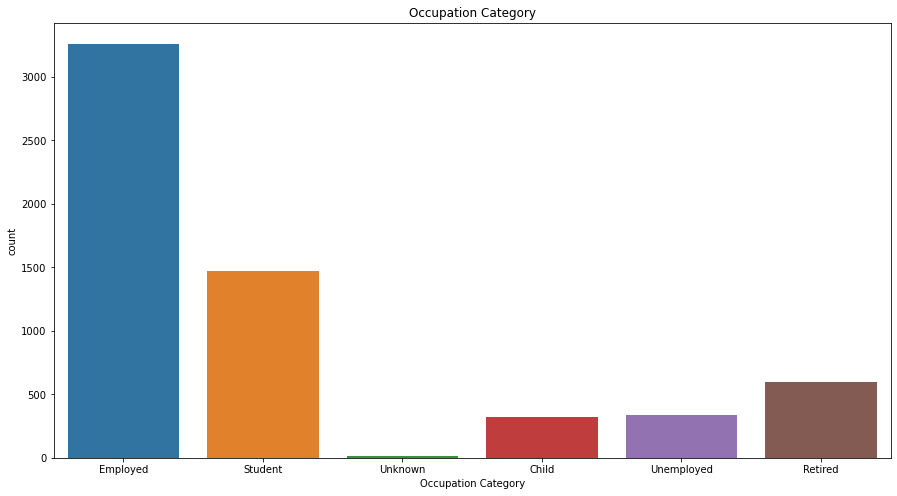

In [69]:
#Set the size of the current figure in inches
plt.gcf().set_size_inches(15,8)

#Create a count plot of the 'Occupation Category' column in the DataFrame
sb.countplot(data=df,x=df['Occupation Category'])

#Set the title of the plot
plt.title('Occupation Category')

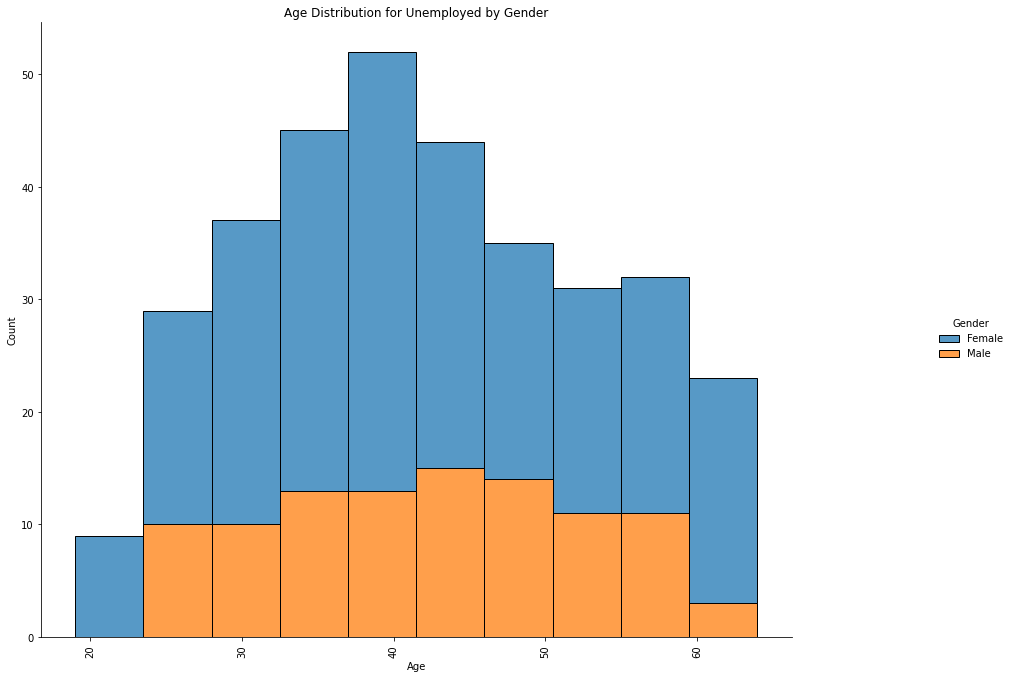

In [70]:
# Filter the data for 'Unemployed' Occupation Category
df_unemployed = df[df['Occupation Category'] == 'Unemployed']


# Create the displot
sb.displot(data=df_unemployed, x='Age', hue='Gender', multiple='stack')

# Rotate x-axis labels
plt.xticks(rotation=90)

#Set the size of the current figure in inches
plt.gcf().set_size_inches(15,10)

# Set the title of the plot
plt.title('Age Distribution for Unemployed by Gender')

# Show the plot
plt.show()

In [71]:
df['Occupation Category'].value_counts()

Employed      3261
Student       1471
Retired        593
Unemployed     337
Child          319
Unknown         14
Name: Occupation Category, dtype: int64

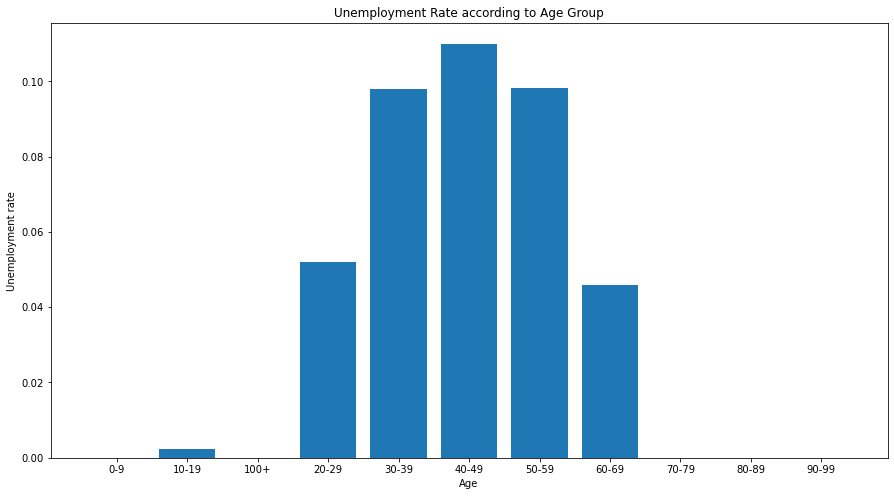

In [72]:
#Calculate the unemployment rate for each age group in the DataFrame
unemployment_rates = df.groupby('Age Group')['Occupation Category'].apply(lambda x: (x == 'Unemployed').sum() / len(x)).reset_index(name='unemployment_rate')

# Set the size of the current figure in inches
plt.gcf().set_size_inches(15,8)

#Create a bar plot of the unemployment rates by age
plt.bar(unemployment_rates['Age Group'], unemployment_rates['unemployment_rate'])

#Set the x-axis label
plt.xlabel('Age')

#Set the y-axis label
plt.ylabel('Unemployment rate')

#Set the title of the plot
plt.title('Unemployment Rate according to Age Group')

#Show the plot
plt.show()

In [73]:
# Sort the unemployment rates in descending order
sorted_unemployment_rates = unemployment_rates.sort_values('unemployment_rate', ascending=False)

# Print the age with the highest unemployment rate
print(sorted_unemployment_rates.head(10))

  Age Group  unemployment_rate
5     40-49           0.109989
6     50-59           0.098093
4     30-39           0.097815
3     20-29           0.051948
7     60-69           0.045908
1     10-19           0.002418
0       0-9           0.000000
2      100+           0.000000
8     70-79           0.000000
9     80-89           0.000000


### Examine the number of university students. All of these are commuters since there are no universities in the town. Are there any other professions that are likely to be commuters?

In [74]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupation Category
0,1,Cannon Street,Steven,Webster,45,Head,Single,Male,Chief Technology Officer,None,None,40-49,Employed
1,1,Cannon Street,Wayne,Perkins,39,None,Single,Male,"Therapist, horticultural",None,None,30-39,Employed
2,1,Cannon Street,Garry,O'Sullivan,43,None,Single,Male,Records manager,None,Methodist,40-49,Employed
3,1,Cannon Street,Jenna,Herbert,62,None,Single,Female,Outdoor activities/education manager,None,None,60-69,Employed
4,2,Cannon Street,Katy,Johnson,48,Head,Single,Female,"Loss adjuster, chartered",None,None,40-49,Employed


In [75]:
# Filter the data to only include university students
university_students = df[df['Occupation'] == 'University Student']

# Calculate the total number of university students
num_university_students = len(university_students)

# Print the results
print(f'Number of university students: {num_university_students}')

Number of university students: 433


In [76]:
#Calculate the total population in the DataFrame
population=len(df)

#Calculate the number of university students who are emigrants per thousand individuals
emigrant_university_students = round((num_university_students/population)*1000)

#Print the result
print(f'There are {emigrant_university_students} University students per thousand')

There are 72 University students per thousand


In [77]:
#function to check the list of occupations and identify highly-skilled, skilled, skilled-trade and others

def skill(row):
    if row in ['Academic librarian', 'Accountant, chartered', 'Accountant, chartered certified', 'Accountant, chartered management', 'Accountant, chartered public finance', 'Adult nurse', 'Advertising account executive', 'Advertising account planner', 'Advertising art director', 'Advertising copywriter', 'Aeronautical engineer', 'Agricultural consultant', 'Agricultural engineer', 'Airline pilot', 'Analytical chemist', 'Animal nutritionist', 'Animator', 'Applications developer', 'Archaeologist', 'Architect', 'Associate Professor', 'Astronomer', 'Audiological scientist', 'Automotive engineer', 'Banker', 'Barrister', 'Biochemist, clinical', 'Biomedical engineer', 'Biomedical scientist', 'Broadcast engineer', 'Broadcast presenter', 'Building control surveyor', 'Building services engineer', 'Building surveyor', 'Cartographer', 'Chartered accountant', 'Chartered certified accountant', 'Chartered legal executive (England and Wales)', 'Chartered loss adjuster', 'Chartered management accountant', 'Chartered public finance accountant', 'Chemical engineer', 'Chemist, analytical', 'Chief Executive Officer', 'Chief Financial Officer', 'Chief Marketing Officer', 'Chief of Staff', 'Chief Operating Officer', 'Chief Strategy Officer', 'Chief Technology Officer', 'Child psychotherapist', 'Chiropodist', 'Chiropractor', 'Civil engineer, consulting', 'Civil engineer, contracting', 'Clinical biochemist', 'Clinical cytogeneticist', 'Clinical embryologist', 'Clinical molecular geneticist', 'Clinical psychologist', 'Clinical research associate', 'Clinical scientist, histocompatibility and immunogenetics', 'Commercial/residential surveyor', 'Communications engineer', 'Community pharmacist', 'Computer games developer', 'Consulting civil engineer', 'Contracting civil engineer', 'Contractor', 'Control and instrumentation engineer', 'Copywriter, advertising', 'Corporate investment banker', 'Cytogeneticist', 'Data scientist', 'Database administrator', 'Dentist', 'Diagnostic radiographer', 'Dietitian', 'Doctor, general practice', 'Doctor, hospital', 'Drilling engineer', 'Ecologist', 'Economist', 'Electrical engineer', 'Electronics engineer', 'Embryologist, clinical', 'Energy engineer', 'Energy manager', 'Engineer, aeronautical', 'Engineer, agricultural', 'Engineer, automotive', 'Engineer, biomedical', 'Engineer, broadcasting (operations)', 'Engineer, building services', 'Engineer, chemical', 'Engineer, civil (consulting)', 'Engineer, civil (contracting)', 'Engineer, communications', 'Engineer, control and instrumentation', 'Engineer, drilling', 'Engineer, electrical', 'Engineer, electronics', 'Engineer, energy', 'Engineer, land', 'Engineer, maintenance', 'Engineer, maintenance (IT)', 'Engineer, manufacturing', 'Engineer, manufacturing systems', 'Engineer, materials', 'Engineer, mining', 'Engineer, petroleum', 'Engineer, production', 'Engineer, site', 'Engineer, structural', 'Engineer, technical sales', 'Engineer, water', 'Engineering geologist', 'Environmental consultant', 'Environmental health practitioner', 'Ergonomist', 'Estate manager/land agent', 'Exercise physiologist', 'Facilities manager', 'Field seismologist', 'Financial adviser', 'Financial controller', 'Financial manager', 'Financial planner', 'Financial risk analyst', 'Forensic psychologist', 'Forensic scientist', 'Further education lecturer', 'Gaffer', 'Games developer', 'General practice doctor', 'Geneticist, molecular', 'Geochemist', 'Geologist, engineering', 'Geologist, wellsite', 'Geophysical data processor', 'Geophysicist/field seismologist', 'Geoscientist', 'Haematologist', 'Health physicist', 'Health promotion specialist', 'Health service manager', 'Health visitor', 'Herpetologist', 'Higher education lecturer', 'Hospital doctor', 'Hospital pharmacist', 'Hydrogeologist', 'Hydrographic surveyor', 'Hydrologist', 'Immunologist', 'Information systems manager', 'Insurance broker', 'Insurance risk surveyor', 'Intelligence analyst', 'Investment analyst', 'Investment banker, corporate', 'Investment banker, operational', 'IT consultant', 'IT sales professional', 'IT trainer', 'Journalist, broadcasting', 'Journalist, magazine', 'Journalist, newspaper', 'Land/geomatics surveyor', 'Landscape architect', 'Lawyer', 'Learning disability nurse', 'Lecturer, further education', 'Lecturer, higher education', 'Librarian, academic', 'Licensed conveyancer', 'Location manager', 'Logistics and distribution manager', 'Loss adjuster, chartered', 'Magazine journalist', 'Maintenance engineer', 'Management consultant', 'Manufacturing engineer', 'Manufacturing systems engineer', 'Materials engineer', 'Mechanical engineer', 'Media buyer', 'Media planner', 'Medical illustrator', 'Medical physicist', 'Mental health nurse', 'Metallurgist', 'Meteorologist', 'Microbiologist', 'Midwife', 'Minerals surveyor', 'Mining engineer', 'Mudlogger', 'Multimedia programmer', 'Multimedia specialist', 'Naval architect', 'Network engineer', 'Neurosurgeon', 'Newspaper journalist', 'Nurse, adult', "Nurse, children's'", 'Nurse, learning disability', 'Nurse, mental health', 'Nutritional therapist', 'Occupational hygienist', 'Occupational psychologist', 'Occupational therapist', 'Oncologist', 'Operational investment banker', 'Operational researcher', 'Operations geologist', 'Ophthalmologist', 'Optometrist', 'Orthoptist', 'Osteopath', 'Paediatric nurse', 'Patent attorney', 'Patent examiner', 'Pathologist', 'Petroleum engineer', 'Pharmacist, hospital', 'Pharmacologist', 'Physicist, medical', 'Physiological scientist', 'Physiotherapist', 'Phytotherapist', 'Pilot, airline', 'Planning and development surveyor', 'Podiatrist', 'Producer, television/film/video', 'Product manager', 'Product/process development scientist', 'Production engineer', 'Professor Emeritus', 'Programmer, applications', 'Programmer, multimedia', 'Programmer, systems', 'Psychiatric nurse', 'Psychiatrist', 'Psychologist, clinical', 'Psychologist, counselling', 'Psychologist, educational', 'Psychologist, forensic', 'Psychologist, occupational', 'Psychologist, prison and probation services', 'Psychologist, sport and exercise', 'Psychotherapist', 'Publishing rights manager', 'Purchasing manager', 'Quality manager', 'Quantity surveyor', 'Radiation protection practitioner', 'Radiographer, diagnostic', 'Radiographer, therapeutic', 'Recruitment consultant', 'Research scientist (life sciences)', 'Research scientist (maths)', 'Research scientist (medical)', 'Research scientist (physical sciences)', 'Retail banker', 'Risk analyst', 'Risk manager', 'Runner, broadcasting/film/video', 'Rural practice surveyor', 'Sales professional, IT', 'Scientist, audiological', 'Scientist, biomedical', 'Scientist, clinical (histocompatibility and immunogenetics)', 'Scientist, forensic', 'Scientist, marine', 'Scientist, physiological', 'Scientist, product/process development', 'Scientist, research (life sciences)', 'Scientist, research (maths)', 'Scientist, research (medical)', 'Scientist, research (physical sciences)', 'Scientist, water quality', 'Seismic interpreter', 'Site engineer', 'Software engineer', 'Solicitor', 'Solicitor, Scotland', 'Special effects artist', 'Speech and language therapist', 'Sport and exercise psychologist', 'Statistician', 'Structural engineer', 'Surgeon', 'Surveyor, building', 'Surveyor, building control', 'Surveyor, commercial/residential', 'Surveyor, hydrographic', 'Surveyor, insurance', 'Surveyor, land/geomatics', 'Surveyor, minerals', 'Surveyor, mining', 'Surveyor, planning and development', 'Surveyor, quantity', 'Surveyor, rural practice', 'Systems analyst', 'Systems developer', 'Technical sales engineer', 'Telecommunications researcher', 'Therapeutic radiographer', 'Therapist, occupational', 'Town planner', 'Toxicologist', 'Trade mark attorney', 'Veterinary surgeon', 'Water engineer', 'Water quality scientist', 'Web designer', 'Wellsite geologist']:
        return 'Highly-Skilled'
    elif row in ['Accommodation manager', 'Accounting technician', 'Actor', 'Actuary', 'Acupuncturist', 'Administrator', 'Administrator, arts', 'Administrator, charities/voluntary organisations', 'Administrator, Civil Service', 'Administrator, education', 'Administrator, local government', 'Administrator, sports', 'Adult guidance worker', 'Advice worker', 'Aid worker', 'Air broker', 'Air cabin crew', 'Air traffic controller', 'Ambulance person', 'Animal technologist', 'Arboriculturist', 'Architectural technologist', 'Archivist', 'Armed forces logistics/support/administrative officer', 'Armed forces operational officer', 'Armed forces technical officer', 'Armed forces training and education officer', 'Art gallery manager', 'Art therapist', 'Artist', 'Arts administrator', 'Arts development officer', "Barrister's clerk", 'Best boy', 'Brewing technologist', 'Broadcast journalist', 'Buyer, industrial', 'Buyer, retail', 'Cabin crew', 'Call centre manager', 'Camera operator', 'Careers adviser', 'Careers information officer', 'Catering manager', 'Ceramics designer', 'Charity fundraiser', 'Charity officer', 'Civil Service administrator', 'Civil Service fast streamer', 'Claims inspector/assessor', 'Clothing/textile technologist', 'Colour technologist', 'Commercial art gallery manager', 'Commercial horticulturist', 'Commissioning editor', 'Community arts worker', 'Community development worker', 'Community education officer', 'Company secretary', 'Comptroller', 'Conference centre manager', 'Conservation officer, historic buildings', 'Conservation officer, nature', 'Conservator, furniture', 'Conservator, museum/gallery', 'Corporate treasurer', 'Counselling psychologist', 'Counsellor', 'Curator', 'Customer service manager', 'Dance movement psychotherapist', 'Data processing manager', 'Development worker, community', 'Development worker, international aid', 'Diplomatic Services operational officer', 'Dispensing optician', 'Dramatherapist', 'Early years teacher', 'Editor, commissioning', 'Editor, film/video', 'Editor, magazine features', 'Editorial assistant', 'Education administrator', 'Education officer, community', 'Education officer, environmental', 'Education officer, museum', 'Educational psychologist', 'Emergency planning/management officer', 'English as a foreign language teacher', 'English as a second language teacher', 'Environmental education officer', 'Environmental manager', 'Equality and diversity officer', 'Equities trader', 'Estate agent', 'Event organiser', 'Exhibition designer', 'Exhibitions officer, museum/gallery', 'Farm manager', 'Fast food restaurant manager', 'Field trials officer', 'Film/video editor', 'Financial trader', 'Firefighter', 'Fish farm manager', 'Fisheries officer', 'Fitness centre manager', 'Food technologist', 'Forest/woodland manager', 'Freight forwarder', 'Futures trader', 'Garment/textile technologist', 'Geographical information systems officer', 'Government social research officer', 'Graphic designer', 'Health and safety adviser', 'Health and safety inspector', 'Heritage manager', 'Higher education careers adviser', 'Historic buildings inspector/conservation officer', 'Holiday representative', 'Homeopath', 'Horticultural consultant', 'Horticultural therapist', 'Horticulturist, amenity', 'Hotel manager', 'Housing manager/officer', 'Human resources officer', 'Illustrator', 'Immigration officer', 'Industrial buyer', 'Industrial/product designer', 'Information officer', 'Insurance account manager', 'Insurance claims handler', 'Insurance underwriter', 'Interior and spatial designer', 'International aid/development worker', 'Interpreter', 'IT technical support officer', 'Jewellery designer', 'Learning mentor', 'Legal executive', 'Legal secretary', 'Leisure centre manager', 'Lexicographer', 'Librarian, public', 'Lighting technician, broadcasting/film/video', 'Lobbyist', 'Local government officer', 'Magazine features editor', 'Marine scientist', 'Market researcher', 'Marketing executive', 'Medical laboratory scientific officer', 'Medical sales representative', 'Medical secretary', 'Medical technical officer', 'Merchandiser, retail', 'Merchant navy officer', 'Museum education officer', 'Museum/gallery conservator', 'Museum/gallery curator', 'Museum/gallery exhibitions officer', 'Music therapist', 'Music tutor', 'Musician', 'Nature conservation officer', 'Oceanographer', 'Office manager', 'Optician, dispensing', 'Outdoor activities/education manager', 'Paramedic', 'Passenger transport manager', 'Pension scheme manager', 'Pensions consultant', 'Personal assistant', 'Personnel officer', 'Pharmacist, community', 'Photographer', 'Plant breeder/geneticist', 'Police officer', "Politician's assistant", 'Presenter, broadcasting', 'Press photographer', 'Press sub', 'Primary school teacher', 'Print production planner', 'Printmaker', 'Prison officer', 'Private music teacher', 'Probation officer', 'Producer, radio', 'Product designer', 'Production assistant, radio', 'Production assistant, television', 'Production designer, theatre/television/film', 'Production manager', 'Programme researcher, broadcasting/film/video', 'Proofreader', 'Psychotherapist, child', 'Psychotherapist, dance movement', 'Public affairs consultant', 'Public house manager', 'Public librarian', 'Public relations account executive', 'Public relations officer', 'Publishing copy', 'Quarry manager', 'Race relations officer', 'Radio broadcast assistant', 'Radio producer', 'Ranger/warden', 'Records manager', 'Recycling officer', 'Regulatory affairs officer', 'Research officer, government', 'Research officer, political party', 'Research officer, trade union', 'Restaurant manager', 'Restaurant manager, fast food', 'Retail buyer', 'Retail manager', 'Retail merchandiser', 'Sales executive', 'Sales promotion account executive', 'Science writer', 'Scientific laboratory technician', 'Secondary school teacher', 'Secretary, company', 'Secretary/administrator', 'Senior tax professional/tax inspector', 'Set designer', 'Ship broker', 'Social research officer, government', 'Social researcher', 'Social worker', 'Soil scientist', 'Sound technician, broadcasting/film/video', 'Special educational needs teacher', 'Sports administrator', 'Sports coach', 'Sports development officer', 'Sports therapist', 'Stage manager', 'Tax adviser', 'Tax inspector', 'Teacher, adult education', 'Teacher, early years/pre', 'Teacher, English as a foreign language', 'Teacher, music', 'Teacher, primary school', 'Teacher, secondary school', 'Teacher, special educational needs', 'Teaching laboratory technician', 'Technical author', 'Technical brewer', 'TEFL teacher', 'Television camera operator', 'Television floor manager', 'Television production assistant', 'Television/film/video producer', 'Theatre director', 'Theatre manager', 'Theatre stage manager', 'Theme park manager', 'Therapist, art', 'Therapist, drama', 'Therapist, horticultural', 'Therapist, music', 'Therapist, nutritional', 'Therapist, speech and language', 'Therapist, sports', 'Tour manager', 'Tourism officer', 'Tourist information centre manager', 'Trade union research officer', 'Trading standards officer', 'Training and development officer', 'Translator', 'Transport planner', 'Travel agency manager', 'Tree surgeon', 'Video editor', 'Visual merchandiser', 'Volunteer coordinator', 'Warden/ranger', 'Warehouse manager', 'Waste management officer', 'Writer', 'Youth worker']:
        return 'Skilled'
    elif row in ['Amenity horticulturist', 'Barista', 'Bonds trader', 'Bookseller', 'Dancer', 'Dealer', 'Designer, blown glass/stained glass', 'Designer, ceramics/pottery', 'Designer, exhibition/display', 'Designer, fashion/clothing', 'Designer, furniture', 'Designer, graphic', 'Designer, industrial/product', 'Designer, interior/spatial', 'Designer, jewellery', 'Designer, multimedia', 'Designer, television/film set', 'Designer, textile', 'Fashion designer', 'Fine artist', 'Furniture conservator/restorer', 'Furniture designer', 'Glass blower/designer', 'Herbalist', 'Horticulturist, commercial', 'Textile designer']:
        return 'Skilled-Trade'
    elif row in ['University Student']:
        return 'University Student'
    elif row in ['Student']:
        return 'Student'
    elif row in  ['Retired']:
        return 'Retired'
    elif row in ['Unemployed']:
        return 'Unemployed'
    elif row in ['Child']:
        return 'Child'
    else:
        return "Unknown"

#assign the list to a newly created series     
df['Skillset'] = df['Occupation'].apply(skill)

In [78]:
#Group the DataFrame by 'Occupation Category' and calculate summary statistics for 'Age' column within each group
df.groupby('Occupation Category')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation Category,,,,,,,,
Child,319.0,2.115987,1.390340,0.0,1.00,2.0,3.0,4.0
Employed,3261.0,42.515179,12.401619,19.0,32.00,42.0,52.0,67.0
Retired,593.0,76.892074,8.106668,65.0,70.00,75.0,82.0,105.0
Student,1471.0,14.300476,5.443663,4.0,10.00,15.0,19.0,32.0
Unemployed,337.0,41.940653,11.238594,19.0,33.00,41.0,51.0,64.0
Unknown,14.0,45.785714,11.923981,23.0,40.25,47.5,57.0,58.0


Text(0.5, 1.0, 'Skillset plot')

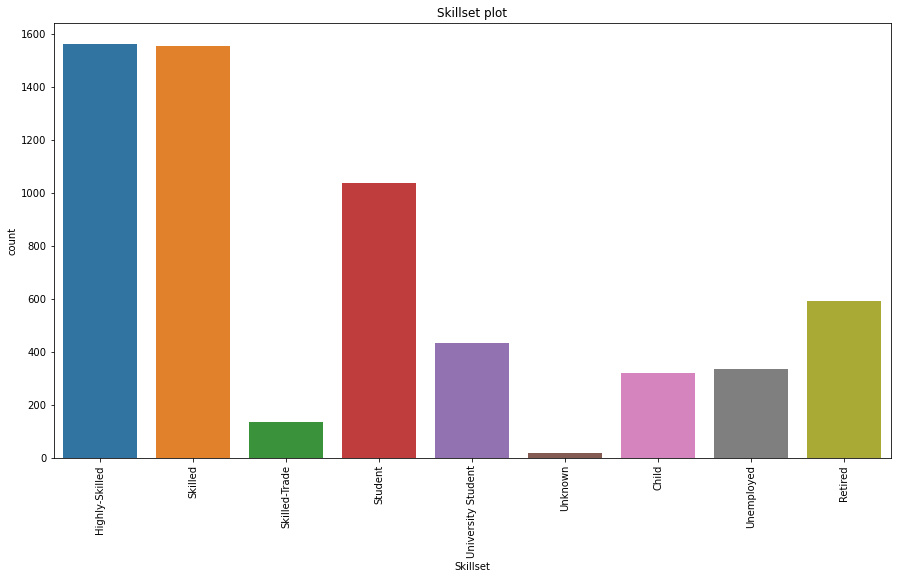

In [79]:
#Create a count plot of the 'Skillset' column in the DataFrame
sb.countplot(data=df, x='Skillset')

# Set the size of the current figure in inches
plt.gcf().set_size_inches(15,8)

#Rotate the x-axis labels by 90 degrees for readability
plt.xticks(rotation = 90)

#Set the title of the plot
plt.title('Skillset plot')

#### Commuters

In [80]:
#function to check the list of occupations and identify the commuters and non-commuters

def commute(row):
    if row in ['Academic librarian', 'Accountant, chartered', 'Accountant, chartered certified', 'Accountant, chartered management', 'Accountant, chartered public finance', 'Actor', 'Actuary', 'Advertising account executive', 'Advertising account planner', 'Advertising art director', 'Advertising copywriter', 'Aeronautical engineer', 'Agricultural consultant', 'Agricultural engineer', 'Air broker', 'Air cabin crew', 'Air traffic controller', 'Airline pilot', 'Analytical chemist', 'Animator', 'Applications developer', 'Archaeologist', 'Architect', 'Artist', 'Associate Professor', 'Astronomer', 'Audiological scientist', 'Automotive engineer', 'Banker', 'Barrister', 'Best boy', 'Biochemist, clinical', 'Biomedical engineer', 'Biomedical scientist', 'Broadcast engineer', 'Broadcast journalist', 'Building control surveyor', 'Building services engineer', 'Building surveyor', 'Buyer, industrial', 'Buyer, retail', 'Cabin crew', 'Cartographer', 'Chartered accountant', 'Chartered certified accountant', 'Chartered legal executive (England and Wales)', 'Chartered loss adjuster', 'Chartered management accountant', 'Chartered public finance accountant', 'Chemical engineer', 'Chemist, analytical', 'Chief Executive Officer', 'Chief Financial Officer', 'Chief Marketing Officer', 'Chief Operating Officer', 'Chief Strategy Officer', 'Chief Technology Officer', 'Child psychotherapist', 'Chiropodist', 'Chiropractor', 'Civil engineer, consulting', 'Civil engineer, contracting', 'Clinical biochemist', 'Clinical cytogeneticist', 'Clinical embryologist', 'Clinical molecular geneticist', 'Clinical psychologist', 'Clinical research associate', 'Clinical scientist, histocompatibility and immunogenetics', 'Commercial/residential surveyor', 'Communications engineer', 'Community arts worker', 'Computer games developer', 'Consulting civil engineer', 'Contracting civil engineer', 'Contractor', 'Control and instrumentation engineer', 'Copywriter, advertising', 'Corporate investment banker', 'Cytogeneticist', 'Data scientist', 'Database administrator', 'Dealer', 'Dentist', 'Diagnostic radiographer', 'Dietitian', 'Doctor, hospital', 'Drilling engineer', 'Economist', 'Electrical engineer', 'Electronics engineer', 'Embryologist, clinical', 'Energy engineer', 'Energy manager', 'Engineer, aeronautical', 'Engineer, agricultural', 'Engineer, automotive', 'Engineer, biomedical', 'Engineer, broadcasting (operations)', 'Engineer, building services', 'Engineer, chemical', 'Engineer, civil (consulting)', 'Engineer, civil (contracting)', 'Engineer, communications', 'Engineer, control and instrumentation', 'Engineer, drilling', 'Engineer, electrical', 'Engineer, electronics', 'Engineer, energy', 'Engineer, land', 'Engineer, maintenance', 'Engineer, maintenance (IT)', 'Engineer, manufacturing', 'Engineer, manufacturing systems', 'Engineer, materials', 'Engineer, mining', 'Engineer, petroleum', 'Engineer, production', 'Engineer, site', 'Engineer, structural', 'Engineer, technical sales', 'Engineer, water', 'Engineering geologist', 'Environmental consultant', 'Environmental health practitioner', 'Environmental manager', 'Ergonomist', 'Estate manager/land agent', 'Event organiser', 'Field seismologist', 'Financial adviser', 'Financial controller', 'Financial manager', 'Financial planner', 'Financial risk analyst', 'Financial trader', 'Forensic psychologist', 'Forensic scientist', 'Freight forwarder', 'Further education lecturer', 'Futures trader', 'Gaffer', 'Games developer', 'Geneticist, molecular', 'Geochemist', 'Geologist, engineering', 'Geologist, wellsite', 'Geophysical data processor', 'Geophysicist/field seismologist', 'Geoscientist', 'Haematologist', 'Health physicist', 'Health promotion specialist', 'Health visitor', 'Herpetologist', 'Higher education careers adviser', 'Higher education lecturer', 'Hospital doctor', 'Hospital pharmacist', 'Hydrogeologist', 'Hydrographic surveyor', 'Hydrologist', 'Immunologist', 'Industrial buyer', 'Information systems manager', 'Insurance account manager', 'Insurance broker', 'Insurance claims handler', 'Insurance risk surveyor', 'Intelligence analyst', 'Investment analyst', 'Investment banker, corporate', 'Investment banker, operational', 'IT consultant', 'IT sales professional', 'IT technical support officer', 'IT trainer', 'Journalist, broadcasting', 'Journalist, magazine', 'Journalist, newspaper', 'Land/geomatics surveyor', 'Landscape architect', 'Lawyer', 'Lecturer, further education', 'Lecturer, higher education', 'Librarian, academic', 'Licensed conveyancer', 'Location manager', 'Logistics and distribution manager', 'Maintenance engineer', 'Management consultant', 'Manufacturing engineer', 'Manufacturing systems engineer', 'Market researcher', 'Materials engineer', 'Mechanical engineer', 'Media buyer', 'Media planner', 'Medical illustrator', 'Medical physicist', 'Metallurgist', 'Meteorologist', 'Microbiologist', 'Midwife', 'Minerals surveyor', 'Mining engineer', 'Mudlogger', 'Multimedia programmer', 'Multimedia specialist', 'Musician', 'Naval architect', 'Network engineer', 'Neurosurgeon', 'Newspaper journalist', 'Occupational hygienist', 'Occupational psychologist', 'Occupational therapist', 'Oncologist', 'Operational investment banker', 'Operational researcher', 'Operations geologist', 'Ophthalmologist', 'Optometrist', 'Orthoptist', 'Osteopath', 'Patent attorney', 'Patent examiner', 'Pathologist', 'Petroleum engineer', 'Pharmacist, hospital', 'Pharmacologist', 'Physicist, medical', 'Physiological scientist', 'Physiotherapist', 'Phytotherapist', 'Pilot, airline', 'Planning and development surveyor', 'Podiatrist', 'Producer, television/film/video', 'Product manager', 'Product/process development scientist', 'Production engineer', 'Professor Emeritus', 'Programme researcher, broadcasting/film/video', 'Programmer, applications', 'Programmer, multimedia', 'Programmer, systems', 'Psychiatrist', 'Psychologist, clinical', 'Psychologist, educational', 'Psychologist, forensic', 'Psychologist, occupational', 'Psychotherapist, child', 'Quantity surveyor', 'Quarry manager', 'Radiation protection practitioner', 'Radiographer, diagnostic', 'Radiographer, therapeutic', 'Recruitment consultant', 'Regulatory affairs officer', 'Research scientist (life sciences)', 'Research scientist (maths)', 'Research scientist (medical)', 'Research scientist (physical sciences)', 'Risk analyst', 'Risk manager', 'Runner, broadcasting/film/video', 'Sales professional, IT', 'Scientist, audiological', 'Scientist, biomedical', 'Scientist, clinical (histocompatibility and immunogenetics)', 'Scientist, forensic', 'Scientist, marine', 'Scientist, physiological', 'Scientist, product/process development', 'Scientist, research (life sciences)', 'Scientist, research (maths)', 'Scientist, research (medical)', 'Scientist, research (physical sciences)', 'Scientist, water quality', 'Seismic interpreter', 'Set designer', 'Ship broker', 'Site engineer', 'Software engineer', 'Soil scientist', 'Solicitor', 'Solicitor, Scotland', 'Sound technician, broadcasting/film/video', 'Statistician', 'Structural engineer', 'Surgeon', 'Surveyor, building', 'Surveyor, building control', 'Surveyor, commercial/residential', 'Surveyor, hydrographic', 'Surveyor, insurance', 'Surveyor, land/geomatics', 'Surveyor, minerals', 'Surveyor, mining', 'Surveyor, planning and development', 'Surveyor, quantity', 'Systems analyst', 'Systems developer', 'Technical sales engineer', 'Telecommunications researcher', 'Therapeutic radiographer', 'Therapist, occupational', 'Town planner', 'Toxicologist', 'Trade mark attorney', 'Water engineer', 'Water quality scientist', 'Web designer', 'Wellsite geologist','University Student','Designer']:
        
        return 'Commuters'
    
    else:
        return 'Non-commuters'

    
#assign the list to a newly created series 

df['Commute'] = df['Occupation'].apply(commute)

In [81]:
#Count the number of occurrences of each unique value in the 'Commute' column of the DataFrame
df['Commute'].value_counts()

Non-commuters    4000
Commuters        1995
Name: Commute, dtype: int64

Text(0.5, 1.0, 'Skillset plot Vs Commuters')

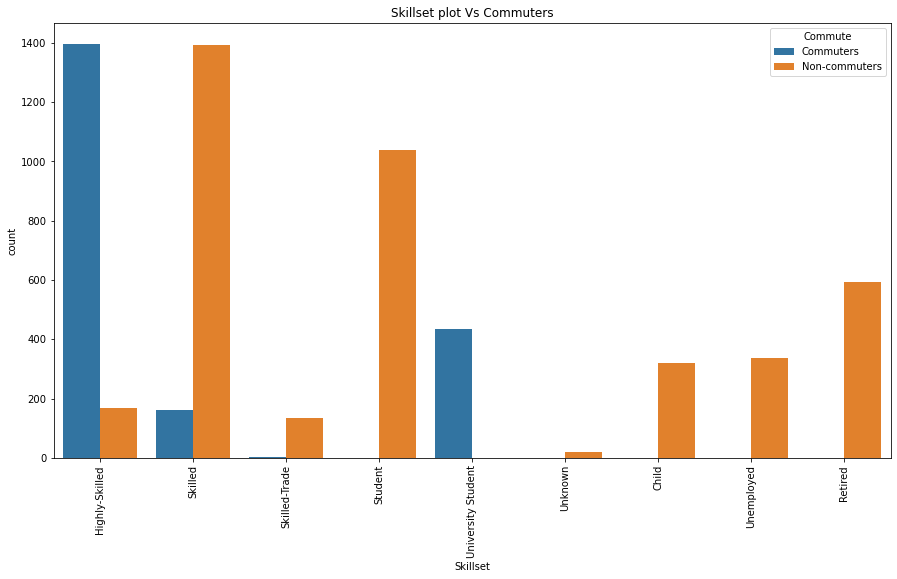

In [82]:
#Create a count plot of the 'Skillset' column in the DataFrame, with each bar split by 'Commute' values
sb.countplot(data=df, x='Skillset', hue='Commute')

# Set the size of the current figure in inches
plt.gcf().set_size_inches(15,8)

#Rotate the x-axis labels by 90 degrees for readability
plt.xticks(rotation = 90)

#Set the title of the plot
plt.title('Skillset plot Vs Commuters')

In [83]:
# Calculate the number of commuters in each occupation
commuting_counts = df.groupby('Occupation')['Commute'].value_counts()

# Filter the data to only include commuters
commuting_counts = commuting_counts.loc[:, 'Commuters']

# Sort the data by the number of commuters
commuting_counts = commuting_counts.sort_values(ascending=False)

# Print the top 5 professions with the most commuters
print('Top 5 professions with the most commuters:')
print(commuting_counts.head(15))

Top 5 professions with the most commuters:
Occupation
University Student                   433
Patent examiner                       13
Surveyor, building                    12
Product manager                       11
Engineer, civil (consulting)          10
IT trainer                            10
Environmental manager                 10
Engineer, communications              10
Planning and development surveyor     10
Scientist, research (maths)           10
Engineer, aeronautical                 9
Occupational psychologist              9
Surveyor, mining                       9
Clinical cytogeneticist                9
Analytical chemist                     9
Name: Commute, dtype: int64


### occupancy level

In [84]:
#number of houses per street
df.groupby('Street')['House Number'].nunique().sort_values(ascending=False)

Street
Evans Hills         160
Jones Cape          138
Jones Avenue         79
Threpenny Road       77
Parry Crescent       60
                   ... 
Bradford Cottage      1
King Obervatory       1
Blue Granary          1
Woodward Haven        1
Young Cabin           1
Name: House Number, Length: 105, dtype: int64

In [85]:
#number of occupants per house
occup_perhouse = df[['Street', 'House Number']].value_counts()
occup_perhouse

Street             House Number
Hayes Drive        12              20
                   1               18
                   15              14
Column Manorhouse  1               12
Bradford Cottage   1               12
                                   ..
Fisher Lane        2                1
                   1                1
Farthing Burgs     10               1
                   8                1
Newcastle River    17               1
Length: 2328, dtype: int64

In [86]:
#total number of occupied houses
print('Total number of houses:', occup_perhouse.count())

Total number of houses: 2328


In [87]:
#Calculate the mode of the 'House Number' column where the 'Street' column is equal to 'Parry Crescent'
avg_occup = df['House Number'][df['Street']=='Parry Crescent'].value_counts().mode()[0]

#Print the result as a string with a message indicating that it is the average occupancy rate
print('Average occupancy rate (mode):', avg_occup)

Average occupancy rate (mode): 4


In [88]:
#Calculate the mode of the 'House Number' column where the 'Street' column is equal to 'Threpenny Road'
avg_occup = df['House Number'][df['Street']=='Threpenny Road'].value_counts().mode()[0]

#Print the result as a string with a message indicating that it is the average occupancy rate
print('Average occupancy rate (mode):', avg_occup)

Average occupancy rate (mode): 4


In [89]:
#population count in each street
df['Street'].value_counts()

Threpenny Road       290
Evans Hills          243
Parry Crescent       230
Jones Cape           227
Scotland Road        208
                    ... 
Woodward Haven         5
Davies Cottage         5
Young Cabin            5
Guinevere Cottage      5
Dixon Station          4
Name: Street, Length: 105, dtype: int64

In [90]:
# Filter the DataFrame to include only families where the head of the house is Married or Divorced and has children
families_with_children_df = df[((df['Relationship to Head of House'] == 'Head') & ((df['Marital Status'] == 'Married') | (df['Marital Status'] == 'Divorced'))) | ((df['Relationship to Head of House'] == 'Son') | (df['Relationship to Head of House'] == 'Daughter')) |(df['Relationship to Head of House'] == 'Lodger')]

# Filter the DataFrame to include only lodgers who are lodging with families with children
lodgers_to_families_with_children_df = families_with_children_df[families_with_children_df['Relationship to Head of House'] == 'Lodger']

# Get the count of visitors visiting families with children
num_Lodgers_to_families_with_children = len(lodgers_to_families_with_children_df)

# Print the result
print(f'Number of Lodgers Lodging with families with children: {num_Lodgers_to_families_with_children}')

# Display the filtered DataFrame of lodgers lodging with families with children
lodgers_to_families_with_children_df


Number of Lodgers Lodging with families with children: 189


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupation Category,Skillset,Commute
26,2,September Lake,Terry,Myers,59,Lodger,Single,Male,"Engineer, petroleum",None,Christian,50-59,Employed,Highly-Skilled,Commuters
45,8,September Lake,Sara,Taylor,21,Lodger,Single,Female,University Student,None,None,20-29,Student,University Student,Commuters
47,8,September Lake,Andrew,Charlton,48,Lodger,Single,Male,Public affairs consultant,None,Methodist,40-49,Employed,Skilled,Non-commuters
103,22,Gill Heights,Lewis,Hutchinson,52,Lodger,Single,Male,Museum education officer,None,Methodist,50-59,Employed,Skilled,Non-commuters
259,25,Musictill Drive,Naomi,Smith,60,Lodger,Divorced,Female,Production engineer,None,Catholic,60-69,Employed,Highly-Skilled,Commuters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,1,Bradford Cottage,Ann,Rahman,25,Lodger,Widowed,Female,"Engineer, mining",None,Catholic,20-29,Employed,Highly-Skilled,Commuters
5934,1,Bradford Cottage,Dale,Lewis,34,Lodger,Single,Male,Research scientist (maths),None,None,30-39,Employed,Highly-Skilled,Commuters
5936,1,Bradford Cottage,Timothy,Barker,43,Lodger,Divorced,Male,"Engineer, technical sales",None,Christian,40-49,Employed,Highly-Skilled,Commuters
5937,1,Bradford Cottage,Diane,Thomas,27,Lodger,Single,Female,Ambulance person,None,Methodist,20-29,Employed,Skilled,Non-commuters


In [91]:
# Filter the DataFrame to include only divorced women who are renting houses to lodgers
divorced_women_renting_to_lodgers_df = df[(df['Marital Status'] == 'Divorced') & (df['Gender'] == 'Female') & (df['Relationship to Head of House'] == 'Lodger')]

# Get the count of divorced women who are renting houses to lodgers
num_divorced_women_renting_to_lodgers = len(divorced_women_renting_to_lodgers_df)

# Print the result
print(f'Number of divorced women renting houses to lodgers: {num_divorced_women_renting_to_lodgers}')

Number of divorced women renting houses to lodgers: 18


In [92]:
high_population=[]
low_population=[]
highly_populated = df['Street'].value_counts()
for street, count in highly_populated.items():
    if count > 100:
        high_population.append((street, count))
    else:
        low_population.append((street, count))

high_population_dataframe = df[df['Street'].isin([street for street, count in high_population])]
low_population_dataframe = df[df['Street'].isin([street for street, count in low_population])]


In [93]:
high_population_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupation Category,Skillset,Commute
52,1,Gill Heights,Jill,Kaur,39,Head,Widowed,Female,Unemployed,None,Methodist,30-39,Unemployed,Unemployed,Non-commuters
53,1,Gill Heights,Sian,Kaur,10,Daughter,NA,Female,Student,None,Unknown,10-19,Student,Student,Non-commuters
54,2,Gill Heights,Jessica,Dunn,49,Head,Married,Female,"Engineer, mining",None,None,40-49,Employed,Highly-Skilled,Commuters
55,2,Gill Heights,Mathew,Dunn,51,Husband,Married,Male,"Psychologist, educational",None,None,50-59,Employed,Highly-Skilled,Commuters
56,2,Gill Heights,Paula,Dunn,20,Daughter,Single,Female,University Student,None,None,20-29,Student,University Student,Commuters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,28,Skylock Avenue,Duncan,Hughes-Norman,8,Son,NA,Male,Student,None,Unknown,0-9,Student,Student,Non-commuters
4855,29,Skylock Avenue,Valerie,Turner,50,Head,Married,Female,Race relations officer,None,Catholic,50-59,Employed,Skilled,Non-commuters
4856,29,Skylock Avenue,Eric,Campbell,53,Husband,Married,Male,Financial trader,None,Catholic,50-59,Employed,Skilled,Commuters
4857,29,Skylock Avenue,Leon,Turner,15,Son,NA,Male,Student,None,Unknown,10-19,Student,Student,Non-commuters


In [94]:
#count the number of unique houses for each street in the high population dataframe
len(high_population_dataframe.groupby('Street')['House Number'].nunique())

19

In [95]:
high_population_dataframe[['Street', 'House Number']].value_counts()

Street           House Number
Hayes Drive      12              20
                 1               18
                 15              14
Williams Avenue  23              11
Hayes Drive      7               11
                                 ..
Morar Course     19               1
Gibbs Crescent   20               1
Jones Cape       9                1
Gibbs Crescent   41               1
Evans Hills      1                1
Length: 1114, dtype: int64

In [96]:
low_population_dataframe[['Street', 'House Number']].value_counts()

Street                House Number
Column Manorhouse     1               12
Bradford Cottage      1               12
Reindeer Radial       6               11
                      4               11
July Keep             1               10
                                      ..
Hussain Orchard       1                1
Earlram Lane          27               1
Hove Unions           13               1
                      7                1
Lichfieldcharm Drive  6                1
Length: 1214, dtype: int64

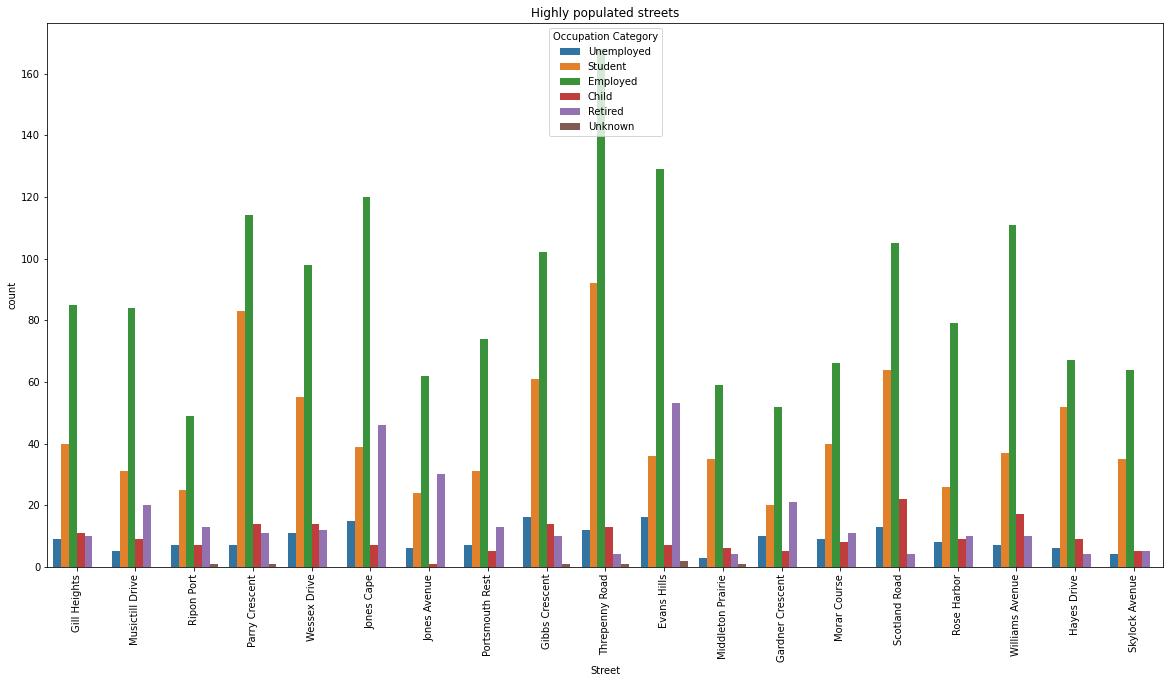

In [97]:
plt.figure(figsize=[20,10])
sb.countplot(data=high_population_dataframe, x = 'Street', hue='Occupation Category');
plt.xticks(rotation=90)
plt.title('Highly populated streets');


In [98]:
high_population_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupation Category,Skillset,Commute
52,1,Gill Heights,Jill,Kaur,39,Head,Widowed,Female,Unemployed,None,Methodist,30-39,Unemployed,Unemployed,Non-commuters
53,1,Gill Heights,Sian,Kaur,10,Daughter,NA,Female,Student,None,Unknown,10-19,Student,Student,Non-commuters
54,2,Gill Heights,Jessica,Dunn,49,Head,Married,Female,"Engineer, mining",None,None,40-49,Employed,Highly-Skilled,Commuters
55,2,Gill Heights,Mathew,Dunn,51,Husband,Married,Male,"Psychologist, educational",None,None,50-59,Employed,Highly-Skilled,Commuters
56,2,Gill Heights,Paula,Dunn,20,Daughter,Single,Female,University Student,None,None,20-29,Student,University Student,Commuters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,28,Skylock Avenue,Duncan,Hughes-Norman,8,Son,NA,Male,Student,None,Unknown,0-9,Student,Student,Non-commuters
4855,29,Skylock Avenue,Valerie,Turner,50,Head,Married,Female,Race relations officer,None,Catholic,50-59,Employed,Skilled,Non-commuters
4856,29,Skylock Avenue,Eric,Campbell,53,Husband,Married,Male,Financial trader,None,Catholic,50-59,Employed,Skilled,Commuters
4857,29,Skylock Avenue,Leon,Turner,15,Son,NA,Male,Student,None,Unknown,10-19,Student,Student,Non-commuters


In [99]:
print("Highly populated streets:")
for street, count in high_population:
    print(f"{street}: {count}")


Highly populated streets:
Threpenny Road: 290
Evans Hills: 243
Parry Crescent: 230
Jones Cape: 227
Scotland Road: 208
Gibbs Crescent: 204
Wessex Drive: 190
Williams Avenue: 182
Gill Heights: 155
Musictill Drive: 149
Hayes Drive: 138
Morar Course: 134
Rose Harbor: 132
Portsmouth Rest: 130
Jones Avenue: 123
Skylock Avenue: 113
Middleton Prairie: 108
Gardner Crescent: 108
Ripon Port: 102


In [100]:
print("Lowly populated streets:")
for street, count in low_population:
    print(f"{street}: {count}")

Lowly populated streets:
Evans Plaza: 98
Lucas Shoals: 90
Threpennyban Street: 84
Green Lane: 82
Hall Creek: 80
Davidson Crescent: 77
Leisure Mall: 73
Chester Road: 73
Powell Coves: 71
Smith Islands: 70
Powell Road: 70
Clark Causeway: 61
Harrison Islands: 59
Violetloop Road: 58
Davies Crescent: 58
Hereford Road: 58
Morrison Avenue: 58
Hall Loop: 56
Reindeer Radial: 54
Egbert Street: 52
Gwent Lock: 52
Dolphin Walks: 50
Richardson Vista: 50
Earlram Lane: 49
Horselink Street: 49
Wolverine Lakes: 43
Spring Prairie: 43
Marsh Lane: 42
Knowles Street: 41
Pigeonpound Lane: 41
Price Locks: 41
Evans Road: 40
Butcher Avenue: 38
Fisher Lane: 37
Collier Squares: 36
Mitchell Crossing: 34
Hove Unions: 34
Hawkins Road: 32
September Lake: 31
Ely Road: 31
Calendar Crescent: 29
Newcastle River: 29
Penny Drive: 26
Webb Highway: 26
Johnson Road: 23
ExcaliburBells Lane: 22
Dodd Street: 22
Hove Crescent: 22
Dunn Avenue: 22
Cannon Street: 21
Nottinghamcut Crescent: 21
Bennett Islands: 21
James Avenue: 21
Glor

In [101]:
len(low_population_dataframe.groupby('Street')['House Number'].nunique())

86

### divorce and marriage rate

In [102]:
df.groupby('Marital Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,581.0,42.612737,17.970084,18.0,27.0,39.0,55.00,105.0
Married,1684.0,50.267815,16.910484,16.0,38.0,49.0,62.00,105.0
NA,1279.0,8.894449,5.151899,0.0,4.5,9.0,14.00,17.0
Single,2161.0,37.144840,14.057515,18.0,25.0,35.0,47.00,94.0
Widowed,290.0,67.827586,18.325147,18.0,66.0,71.0,78.75,104.0


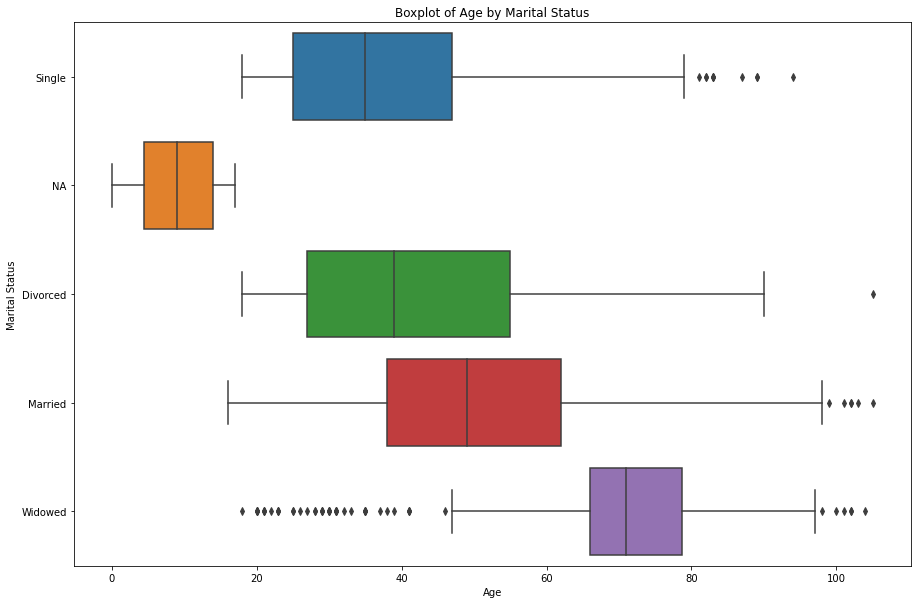

In [122]:
plt.figure(figsize=[15,10])
sb.boxplot(x='Age', y='Marital Status', data=df);
plt.title('Boxplot of Age by Marital Status')
plt.show()

Text(0.5, 1.0, 'Marital Status according to Gender Plot')

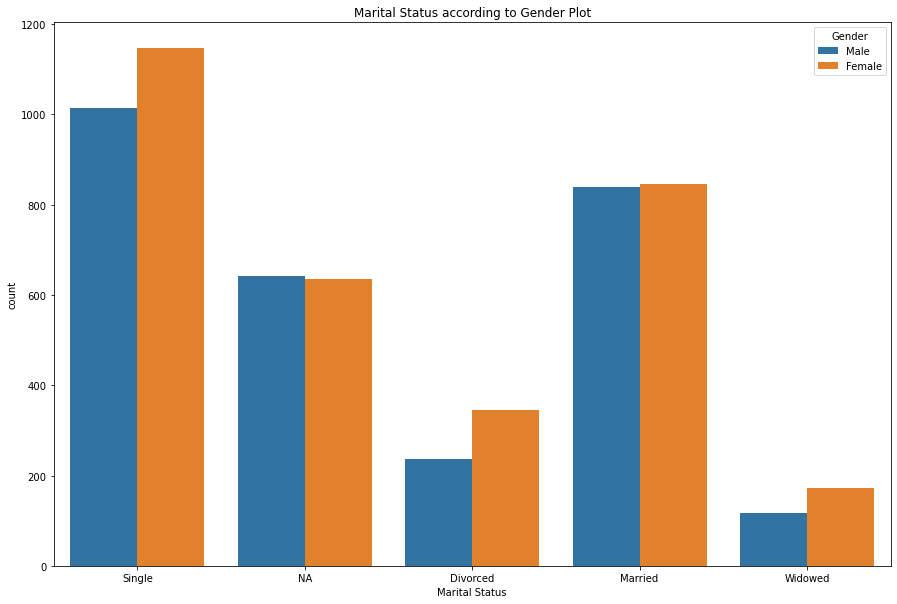

In [104]:
plt.figure(figsize=[15,10])
sb.countplot(data=df, x='Marital Status', hue='Gender')
plt.title('Marital Status according to Gender Plot')

In [105]:
df.groupby('Marital Status')['Gender'].value_counts()

Marital Status  Gender
Divorced        Female     345
                Male       236
Married         Female     845
                Male       839
NA              Male       643
                Female     636
Single          Female    1147
                Male      1014
Widowed         Female     172
                Male       118
Name: Gender, dtype: int64

In [106]:
# Calculate the number of females who are divorced in the dataframe
Female_divorced = len(df[(df['Marital Status']=='Divorced') & (df['Gender']=='Female')])

# Calculate the number of males who are divorced in the dataframe
Male_divorced = len(df[(df['Marital Status']=='Divorced') & (df['Gender']=='Male')])

# Calculate the divorced rates per thousand for females and males
Female_divorced_rate = round((Female_divorced/population)*1000)
Male_divorced_rate = round((Male_divorced/population)*1000)

# Print the calculated divorced rates for females and males
print(f"The female divorced rate per thousands is: {Female_divorced_rate}")
print(f"The male divorced rate per thousands is: {Male_divorced_rate}")


The female divorced rate per thousands is: 58
The male divorced rate per thousands is: 39


In [107]:
# Calculate the count of married individuals in the dataframe
married_count = len(df[df['Marital Status']=='Married'])/2

# Calculate the total population in the dataframe
population = len(df)

# Calculate the marriage rate per thousand
marriage_rate = round((married_count / population) * 1000)

# Print the calculated marriage rate
print(f"The marriage rate is {marriage_rate} per thousand.")


The marriage rate is 140 per thousand.


### Birth and Death rate

In [108]:
births_1yr = len(df[(df.Age ==0)])  # Counting the number of children with age less than or equal to 1 year
crude_birth = round((births_1yr / population) * 1000)  # Calculating the crude birth rate per thousand
print(f'The crude birth rate of children born in the last one year is {crude_birth} per thousand')

The crude birth rate of children born in the last one year is 8 per thousand


In [109]:
# Obtain the count of people age 80 and above
ages80 = df[df['Age Group'] == '80-89'].count()
ages90 = df[df['Age Group'] == '90-99'].count()
ages100plus = df[df['Age Group'] == '100+'].count()

# Calculate the difference in counts between age groups
old_age_count = [abs(ages90['Age'] - ages80['Age']), abs(ages100plus['Age'] - ages90['Age'])]

# Calculate crude death rate as the sum of age count differences divided by 10 times population, rounded up to the nearest integer, and multiplied by 1000
crude_death_rate = math.ceil(sum(old_age_count) / (10 * population) * 1000)

# Print the crude death rate
print(f'The crude death rate is {crude_death_rate} per thousand')


The crude death rate is 3 per thousand


#### INFERMITY

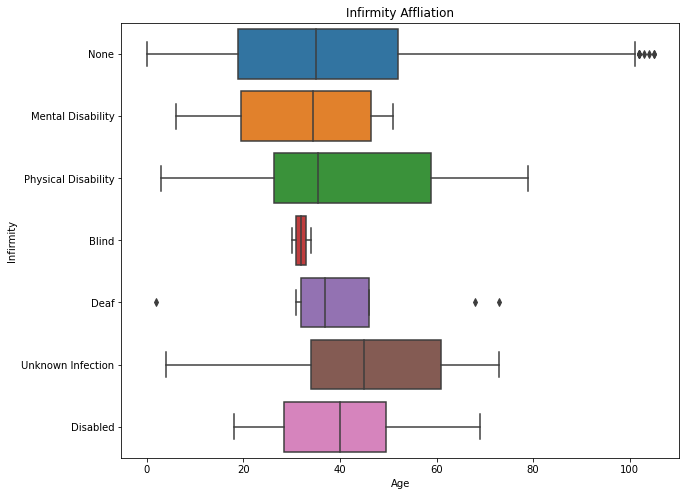

In [110]:
plt.figure(figsize=[10,8])
sb.boxplot(x='Age', y='Infirmity', data=df)
plt.title('Infirmity Affliation')
plt.show()

### Imigrants (Lodgers and Visitors)

In [111]:
# Filter the DataFrame to include rows where 'Relationship to Head of House' is either 'Lodger' or 'Visitor'
lodger_visitor_df = df[(df['Relationship to Head of House'] == 'Lodger') | (df['Relationship to Head of House'] == 'Visitor')]

# Get the length of the filtered DataFrame, which represents the number of lodgers and visitors
num_lodgers_visitors = len(lodger_visitor_df)

# Print the number of lodgers and visitors
print('Number of lodgers and visitors are: ', num_lodgers_visitors)


Number of lodgers and visitors are:  207


In [112]:
# Group by 'Relationship to Head of House' and 'Marital Status' in 'lodger_visitor_df' DataFrame
lodger_visitor_df.groupby(['Relationship to Head of House', 'Marital Status']).size()

Relationship to Head of House  Marital Status
Lodger                         Divorced           39
                               Single            144
                               Widowed             6
Visitor                        Divorced            4
                               Single             14
dtype: int64

In [113]:
'''
The code calculates the number of immigrants per thousand based on the number of 
lodgers and visitors in the dataset as well as the total population.
The result is rounded to the nearest integer and printed as a formatted string.
'''
immigrant = round((num_lodgers_visitors/population)*1000)
print(f'There are {immigrant} Immigrants per thousand')

There are 35 Immigrants per thousand


Text(0.5, 1.0, 'Lodgers and Visitors')

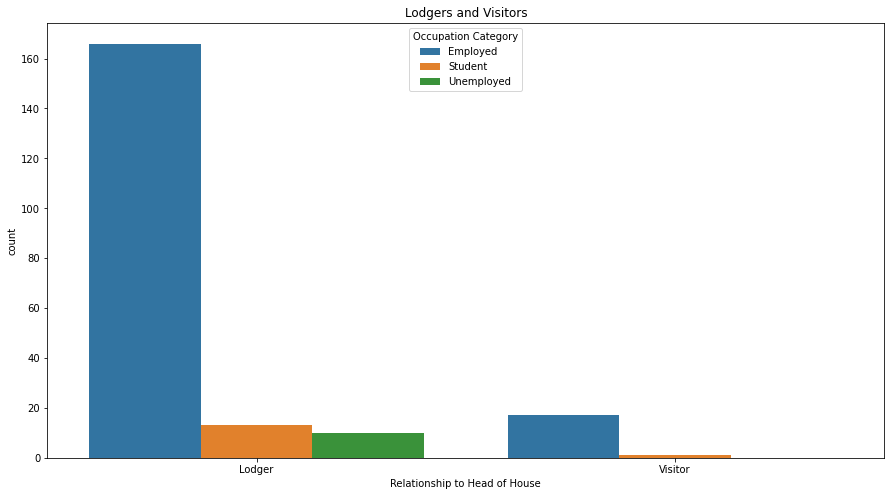

In [114]:
plt.figure(figsize=[15,8])
sb.countplot(data =lodger_visitor_df, x = 'Relationship to Head of House', hue='Occupation Category')
plt.title('Lodgers and Visitors')

In [115]:
report= ProfileReport(df)

report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

References

Murray, B.G., 1997. On calculating birth and death rates. Oikos, pp.384-387.

https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/lifeexpectancies/bulletins/nationallifetablesunitedkingdom/2018to2020